In [1]:
!pip install tensorflow tensorflow-gpu opencv-python mediapipe sklearn matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [1]:
#importing dependancies
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
#Testing Open CV
cap = cv2.VideoCapture(0)
while cap.isOpened():
        ret,frame = cap.read()
        frame = cv2.flip(frame,1)
        cv2.imshow("TESTING OPEN CV",frame)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [3]:
# Getting keypoints from mediapipe holistic
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
     # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [32]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        frame = cv2.flip(frame,1)
        
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [36]:
image #LAST EXECUTED FRAME

array([[[241, 247, 252],
        [237, 244, 249],
        [238, 245, 250],
        ...,
        [153, 158, 154],
        [153, 156, 154],
        [154, 156, 156]],

       [[239, 247, 251],
        [236, 244, 248],
        [237, 246, 250],
        ...,
        [154, 159, 155],
        [155, 158, 156],
        [157, 158, 158]],

       [[238, 247, 248],
        [234, 244, 245],
        [236, 246, 247],
        ...,
        [155, 158, 155],
        [157, 159, 157],
        [159, 159, 159]],

       ...,

       [[166, 190, 176],
        [168, 188, 176],
        [170, 182, 172],
        ...,
        [ 19,  25,  22],
        [ 20,  25,  23],
        [ 20,  24,  22]],

       [[164, 190, 177],
        [165, 187, 175],
        [164, 181, 171],
        ...,
        [ 17,  22,  20],
        [ 19,  23,  21],
        [ 20,  23,  21]],

       [[164, 190, 177],
        [160, 184, 173],
        [161, 180, 170],
        ...,
        [ 17,  21,  19],
        [ 19,  22,  20],
        [ 19,  22,  20]]

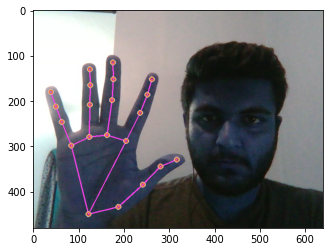

In [37]:
plt.imshow(image)

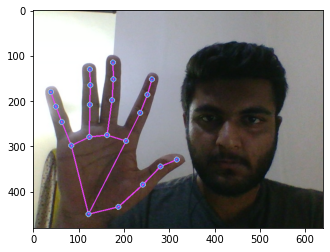

In [38]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [40]:
#Getting all Landmarks (x,y,z,visibility) in one array
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [43]:
# Optimised way to get landmarks for left hand and right hand
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [7]:
# Writing function with optimised code to get landmark values
def extract_keypoints(results):
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh])

In [8]:
# Setting up folders for data collection
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('DATA') 

# Actions that we try to detect
actions = np.array(['A', 'B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U',
                    'V','W','X','Y','Z','BLANK'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [46]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [12]:
#DATA COLLECTION
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()
                frame = cv2.flip(frame,1)
                
                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('DATA COLLECTION', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('DATA COLLECTION', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

FileNotFoundError: [Errno 2] No such file or directory: 'DATA\\DELETE\\0\\0.npy'

In [11]:
  cap.release()
cv2.destroyAllWindows()

In [8]:
#Lable Creation for Features
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [9]:
label_map = {label:num for num, label in enumerate(actions)}

In [10]:
label_map

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'BLANK': 26}

In [11]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [12]:
np.array(sequences).shape

(810, 30, 126)

In [13]:
np.array(labels).shape

(810,)

In [14]:
X = np.array(sequences)

In [15]:
X.shape

(810, 30, 126)

In [16]:
y = to_categorical(labels).astype(int)

In [17]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [19]:
y_test.shape

(41, 27)

In [10]:
#Build and Train LSTM Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [21]:
log_dir = os.path.join('Logs1')
tb_callback = TensorBoard(log_dir=log_dir)

In [11]:
#BUILD MODEL
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,126)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [12]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [24]:
model.fit(X_train, y_train, epochs=330, callbacks=[tb_callback])

Epoch 1/330
25/25 [==============================] - 4s 45ms/step - loss: 3.2836 - categorical_accuracy: 0.0520
Epoch 2/330
25/25 [==============================] - 1s 44ms/step - loss: 3.2338 - categorical_accuracy: 0.0546
Epoch 3/330
25/25 [==============================] - 1s 44ms/step - loss: 3.3149 - categorical_accuracy: 0.0715
Epoch 4/330
25/25 [==============================] - 1s 45ms/step - loss: 3.2413 - categorical_accuracy: 0.0819
Epoch 5/330
25/25 [==============================] - 1s 59ms/step - loss: 3.2035 - categorical_accuracy: 0.0663
Epoch 6/330
25/25 [==============================] - 1s 51ms/step - loss: 3.1920 - categorical_accuracy: 0.0780
Epoch 7/330
25/25 [==============================] - 1s 46ms/step - loss: 3.0609 - categorical_accuracy: 0.0572
Epoch 8/330
25/25 [==============================] - 1s 45ms/step - loss: 2.9623 - categorical_accuracy: 0.0715
Epoch 9/330
25/25 [==============================] - 1s 45ms/step - loss: 2.7804 - categorical_accuracy:

25/25 [==============================] - 1s 44ms/step - loss: 0.2429 - categorical_accuracy: 0.9116
Epoch 146/330
25/25 [==============================] - 1s 45ms/step - loss: 0.2107 - categorical_accuracy: 0.9246
Epoch 147/330
25/25 [==============================] - 1s 45ms/step - loss: 0.2025 - categorical_accuracy: 0.9298
Epoch 148/330
25/25 [==============================] - 1s 44ms/step - loss: 0.1852 - categorical_accuracy: 0.9337
Epoch 149/330
25/25 [==============================] - 1s 44ms/step - loss: 0.1794 - categorical_accuracy: 0.9337
Epoch 150/330
25/25 [==============================] - 1s 45ms/step - loss: 0.1788 - categorical_accuracy: 0.9350
Epoch 151/330
25/25 [==============================] - 1s 45ms/step - loss: 0.1764 - categorical_accuracy: 0.9363
Epoch 152/330
25/25 [==============================] - 1s 44ms/step - loss: 0.1747 - categorical_accuracy: 0.9376
Epoch 153/330
25/25 [==============================] - 1s 45ms/step - loss: 0.1777 - categorical_accur

Epoch 217/330
25/25 [==============================] - 1s 45ms/step - loss: 0.2282 - categorical_accuracy: 0.9168
Epoch 218/330
25/25 [==============================] - 1s 44ms/step - loss: 0.1950 - categorical_accuracy: 0.9363
Epoch 219/330
25/25 [==============================] - 1s 45ms/step - loss: 0.1751 - categorical_accuracy: 0.9415
Epoch 220/330
25/25 [==============================] - 1s 45ms/step - loss: 0.1681 - categorical_accuracy: 0.9415
Epoch 221/330
25/25 [==============================] - 1s 45ms/step - loss: 0.1644 - categorical_accuracy: 0.9441
Epoch 222/330
25/25 [==============================] - 1s 44ms/step - loss: 0.1633 - categorical_accuracy: 0.9441
Epoch 223/330
25/25 [==============================] - 1s 46ms/step - loss: 0.1600 - categorical_accuracy: 0.9441
Epoch 224/330
25/25 [==============================] - 1s 45ms/step - loss: 0.1609 - categorical_accuracy: 0.9415
Epoch 225/330
25/25 [==============================] - 1s 45ms/step - loss: 0.1583 - cat

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            48896     
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 27)                891       
                                                                 
Total params: 204,251
Trainable params: 204,251
Non-trai

In [26]:
res = model.predict(X_test)

2/2 [==============================] - 0s 13ms/step


In [27]:
actions[np.argmax(res[4])]

'M'

In [28]:
model.save('SignLanguageDetection330.h5')

In [13]:
model.load_weights('SignLanguageDetection2000.h5')

In [29]:
#Evaluation with confusion matrix
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [30]:
yhat = model.predict(X_test)

2/2 [==============================] - 0s 9ms/step


In [31]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [32]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[39,  0],
        [ 1,  1]],

       [[40,  0],
        [ 0,  1]],

       [[39,  0],
        [ 0,  2]],

       [[40,  0],
        [ 0,  1]],

       [[40,  0],
        [ 0,  1]],

       [[40,  1],
        [ 0,  0]],

       [[39,  0],
        [ 1,  1]],

       [[40,  0],
        [ 0,  1]],

       [[39,  1],
        [ 1,  0]],

       [[39,  0],
        [ 0,  2]],

       [[38,  0],
        [ 0,  3]],

       [[38,  0],
        [ 1,  2]],

       [[40,  0],
        [ 0,  1]],

       [[39,  0],
        [ 0,  2]],

       [[38,  1],
        [ 0,  2]],

       [[38,  1],
        [ 1,  1]],

       [[39,  0],
        [ 0,  2]],

       [[40,  1],
        [ 0,  0]],

       [[39,  0],
        [ 0,  2]],

       [[40,  0],
        [ 0,  1]],

       [[39,  0],
        [ 0,  2]],

       [[39,  0],
        [ 0,  2]],

       [[40,  0],
        [ 0,  1]],

       [[39,  0],
        [ 1,  1]],

       [[40,  1],
        [ 0,  0]],

       [[38,  0],
        [ 0,  3]]], dtype=int64)

In [33]:
accuracy_score(ytrue, yhat)

0.8536585365853658

In [14]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [15]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        frame = cv2.flip(frame,1)
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 19ms/step
Y
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
Y
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
S
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1

1/1 [==============================] - 0s 18ms/step
G
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
G
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
M
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1

1/1 [==============================] - 0s 18ms/step
U
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
U
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
U
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1